- Data processing
- Feature Engineering
- Model implementation
- Analysis evaluation
- instruction

# Machine Learning - Assignment 1

> Hoang Dang - s3927234

> This notebook will guide you through a series of steps in solving a real world problem with the application of Machine Learning. We will begin by `data processing`, then `implementing the chosen models`, and lastly `performing analysis and evaluation`.

> Thêm Table of Content?

---

## Questions

- Hỏi thầy về cách trình bày, ảnh thì để ở đâu, code thì để ở đâu, nếu để ảnh vs code ở giữa thì tính trang như nào, trình bày như hiện tại thì đã ok chưa?
- Phần report thầy thích jupyter hay latex?
- Phần report thì thầy có muốn xem code ko?

---

- How to use correlation with categorical data? (The `status` column and many other columns are categorical, which is not good for correlation)
- Outliers?
  - Use box diagram to identify
  - What to do with them?
- Nếu histogram có hai cột mà một cột cao hơn thì có phải là skewed ko?
- Tại sao khi bỏ ExtraMedTest và ExtraAlcoholTest thì accuracy giảm nhiều vậy
- Why Training Data and Testing Data are so alike to each other?
- Besides from DecisionTreeClassifier, Logistic Regression, RandomForestClassification
  - RandomForestClassification seems to be the best
  - What other models can I use?
  - Can I use other libraries?
- Skwed data thì sẽ giải quyết như nào?
- What model measurements should I use for this problem? (Accuracy, F1, ...)
  - Bệnh thì nên thừa còn hơn thiếu?
  - Số ca bệnh ít hơn hẳn số ca ko bị, nên thấy bảo nên dùng Recall và Precision thay vì accuracy
  - Có nên xài AUC làm measurement ko?
- Accuracy khoảng bao nhiêu thì là ok, làm thế nào để nằm trong top lớp, 5% là dựa vào tiêu chí nào (Accuracy, F1, ...)
- Có nên remove duplicates ko, nên remove sau hay trc khi train_test_split
- Có một section tên là Feature Engineering, nma mình ko định thêm feature nào, thì sao h?
- Nếu ta làm các bước data preprocessing trong lúc training như normalization, giảm skewed, .. thì khi test cũng phải làm tương tự đúng ko, và ko có cách nào để check chúng ta chẳng may convert data sai hay gì?
- Sau khi chọn được best model, ta có nên train nó bằng 100% training data ko?
- Làm thế nào để yên tâm là ta đang ko overfitting, cứ test trên validation data mà thấy ok thì liệu có thể yên tâm?

- Feedback for EDA, Python script
- Hỏi thầy mấy cái graph plot như này đã ok chưa

## Note

- ROC and AUC: https://www.youtube.com/watch?v=4jRBRDbJemM, điều chỉnh threshold
  - what if there are some parts that red is better, and some parts that blue is better? 
- Use regularization technique to reduce overfitting
- Cross validation
- Cái của mình chắc sẽ là Recall focus, nma nếu ko rõ Precision hay Recall, ta sẽ dùng F1 (Better than accuracy)
- Dataset của mình imbalance (có nhiều ng ko bị hơn là người bị), thầy bảo hỏi chatGPT xem giải phát là gì
- Tut3 có kĩ thuật giảm skewed
- Có thể trình bày theo cách của Tutorial mẫu
- Xử lí skewed data???
- Thầy bảo ExtraMedTest và ExtraAlcoholTest là continous
- Thầy bảo plot hình so sánh các tuning (Tham khảo tut3)
- Có nên print .head() để preview ko
- Shuffle data lên
- nên chia dataset thành 3 phần: 1 training, 1 valiadtion, 1 testing. Nếu chỉ chia thành 2 phần 1 training và 1 testing, thì tức là ta sẽ tuning dựa theo testing, và ta sẽ bị bias vì dùng testing data đấy để làm cái tuning và testing. Thế nên giải pháp là chia làm 3, validation sẽ chỉ dùng để tuning, testing sẽ chỉ dùng để testing model cuối cùng
- Ko giới hạn model

## Tasks

> Tập trung làm script trc nhé, report dể vt sau
- Thi thoảng sẽ display head của data ra để preview
- Làm từng model một, mỗi model sẽ tuning để tìm ra cái tốt nhất



## Instruction

- Có thể nói về các phần kiểu warning, quan trọng, ..

## Data Processing

We begin by importing necessary libraries

In [2]:
import pandas as pd  # for data manipulation and analysis
import numpy as np  # for numerical computing
import matplotlib.pyplot as plt  # for data visualization
import seaborn as sns  # for data visualization

We then load the training data in `data_train.csv` into `health_data` variable. In here, we tell Pandas that the `Id` column will be used as the `index_col` (For indexing purpose only). After that, we use the `.shape` and `.describe` functions to get some insight of the dataset and each column in it

In [3]:
health_data = pd.read_csv("data_train.csv", delimiter=",", index_col="Id")
print(health_data.shape)  # get the size of the DataFrame

pd.set_option('display.max_columns', None)
health_data.describe(include='all')  # get some insight of each column of the dataset

(202944, 24)


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,ExtraMedTest,ExtraAlcoholTest,Status
count,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000
mean,0.428700,0.424344,0.962655,28.379824,0.442634,0.040844,0.094391,0.756302,0.635372,0.811519,0.055912,0.951543,0.083693,2.514024,3.196971,4.256455,0.168707,0.439545,8.037449,5.050245,6.055641,-7.408660,-7.560041,0.175571
std,0.494891,0.494244,0.189607,6.612738,0.496700,0.197929,0.292372,0.429313,0.481327,0.391096,0.229752,0.214730,0.276928,1.070370,7.427247,8.736665,0.374494,0.496333,3.051568,0.985601,2.070140,75.993743,75.927137,0.380455
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,-199.000000,-199.000000,0.000000
25%,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000,-55.000000,-55.000000,0.000000
50%,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000,40.000000,40.000000,0.000000
max,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000,199.000000,199.000000,1.000000


Based on the output, we can see that:
- Our dataset has in total 202,944 rows (records) and 24 columns (23 of which are attributes and the `Status` column as the expected output)
- There are **no missing values** in the dataset since all columns have exactly 202,944 rows
- The percentage of people suffering from High Blood Pressure and High Cholesterol are nearly the same at about 42%
- The average BMI is 28.38, which is relatively high [ref]
- Most people had cholesterol check in the last 5 years (96%) and also most people had Health Care coverage (95%)
- There are minor of people suffered from Stroke (4%), Heavy Alcohol Consump (6%), and No Doctor Cost (8%), Heart Disease and Attack (9%), and Walking Difficulty (17%)
- There are more than a half of people having a healthy lifestyle with Physical Activity at 76%, Fruits Consume at 64%, and Veggies Consume at 81%
- The statistics of ExtraMedTest and ExtraAlcoholTest are nearly the same
- There are 18% of people suffering from diabetes (Target variable)


Besides that, we can also use the `.info` method to see a list of all columns with their corresonding data types as indicated below. We can see that all fields are of type `int64` and has 202,944 non-null records

In [3]:
health_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202944 entries, 0 to 202943
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HighBP                202944 non-null  int64
 1   HighChol              202944 non-null  int64
 2   CholCheck             202944 non-null  int64
 3   BMI                   202944 non-null  int64
 4   Smoker                202944 non-null  int64
 5   Stroke                202944 non-null  int64
 6   HeartDiseaseorAttack  202944 non-null  int64
 7   PhysActivity          202944 non-null  int64
 8   Fruits                202944 non-null  int64
 9   Veggies               202944 non-null  int64
 10  HvyAlcoholConsump     202944 non-null  int64
 11  AnyHealthcare         202944 non-null  int64
 12  NoDocbcCost           202944 non-null  int64
 13  GenHlth               202944 non-null  int64
 14  MentHlth              202944 non-null  int64
 15  PhysHlth              202944 non-null  

In addition to features provided by Pandas, we can also use `Matplotlib` and `Seaborn` to visualize different attributes in the dataset. We will begin by plotting the `histogram` charts to see the data distribution of each attribute

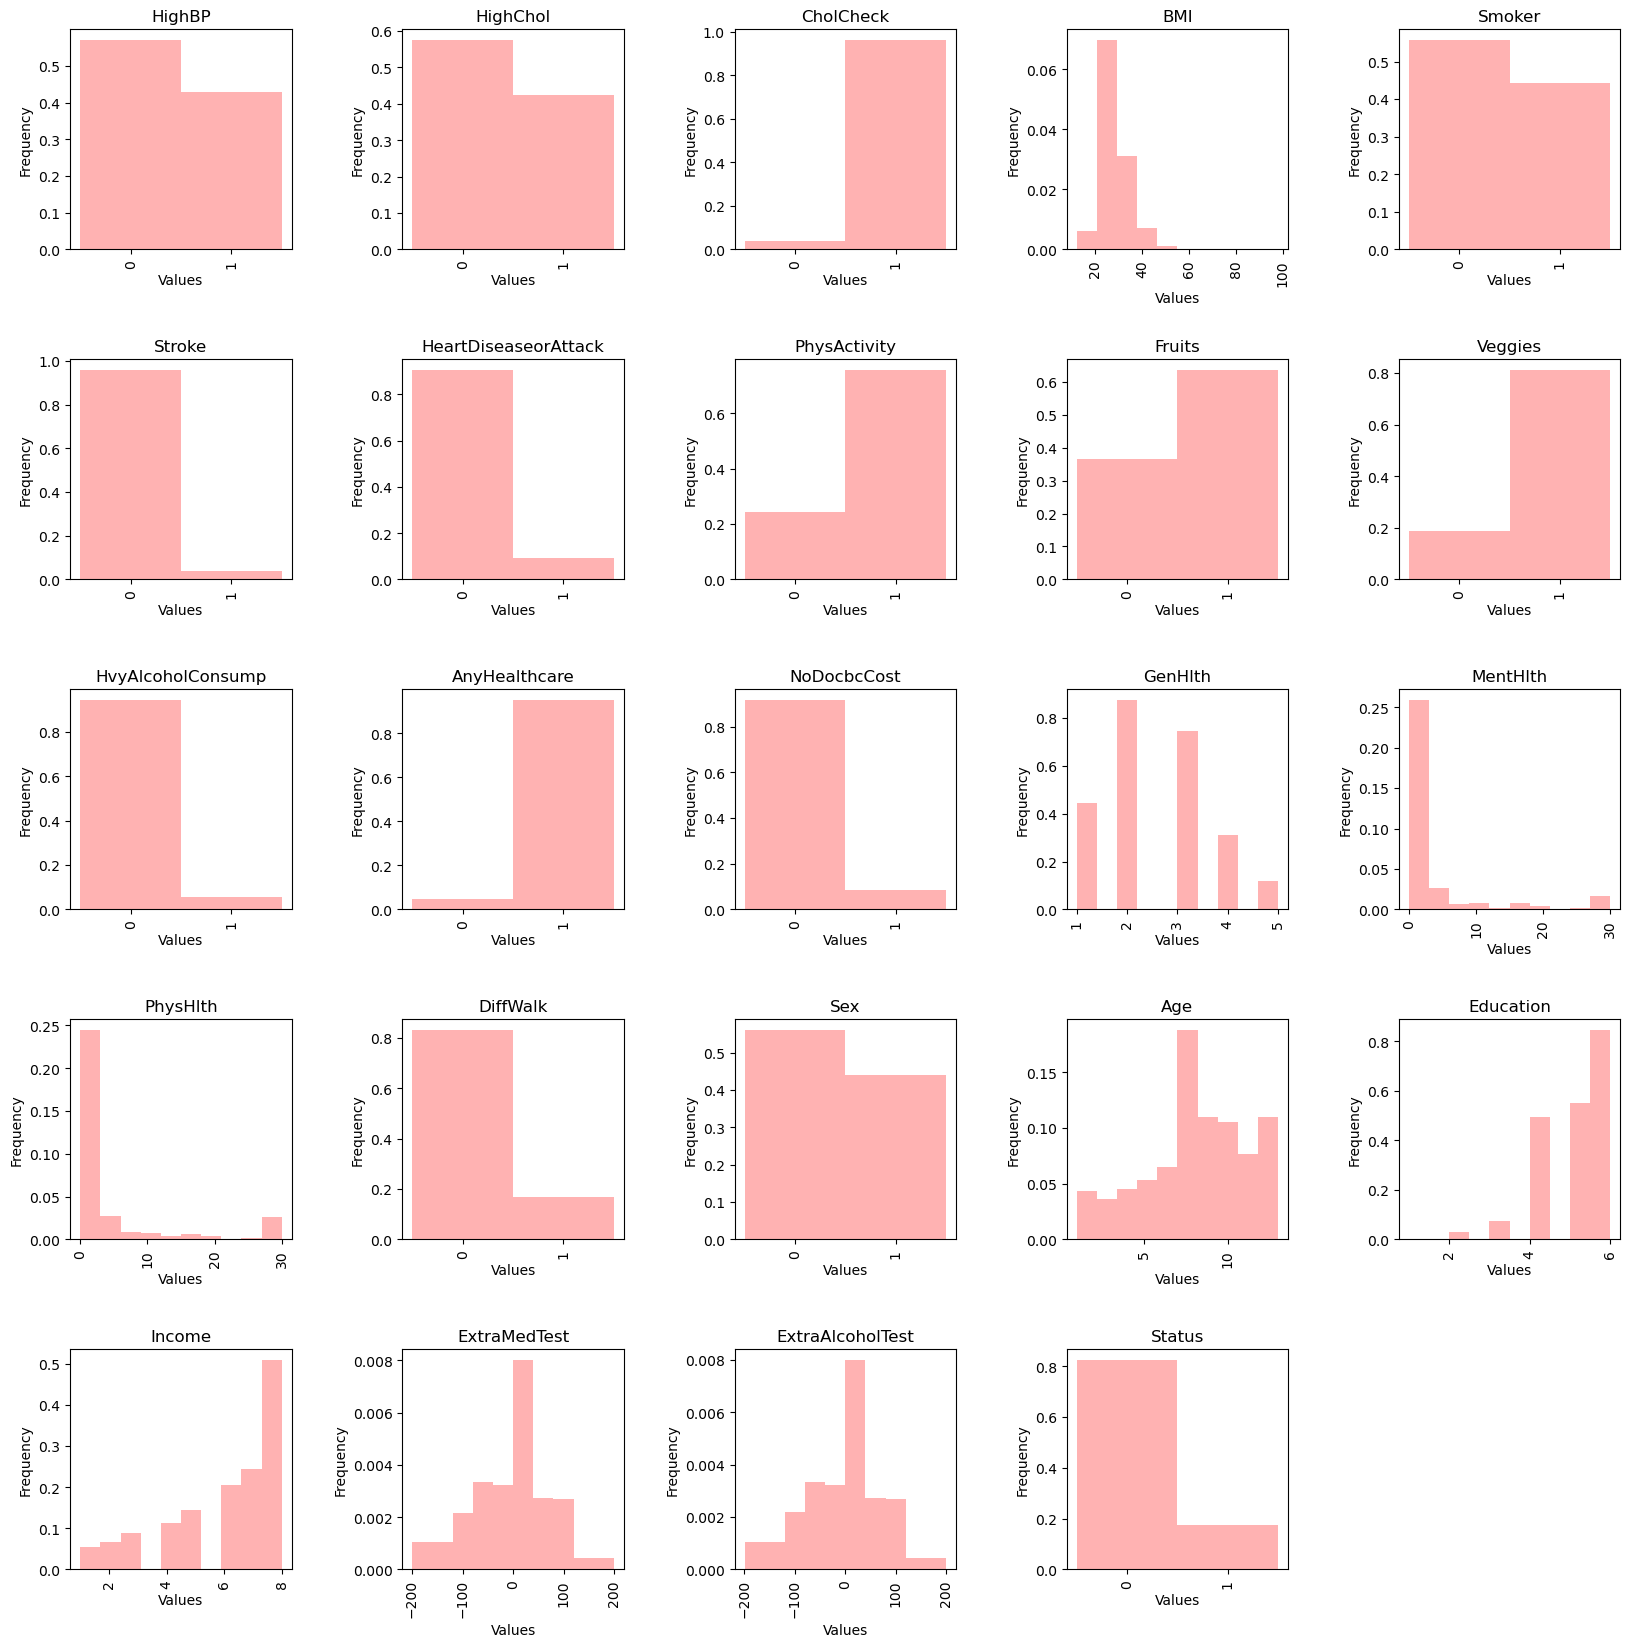

In [5]:
# Create a figure to hold different subplots
plt.figure(figsize=(20,20))

# Iterate through each column in health_data and plot a corresponding histogram
for i, col in enumerate(health_data.columns):
    plt.subplot(5,5,i+1)
    
    # Check if unique values in the column are only 0 and 1
    if sorted(health_data[col].unique()) == [0, 1]:
        plt.hist(health_data[col], bins=[-0.5, 0.5, 1.5], alpha=0.3, color='r', density=True)
        plt.xticks([0, 1])
    else:
        plt.hist(health_data[col], alpha=0.3, color='r', density=True)
    
    plt.title(col)
    plt.xticks(rotation='vertical')

    # Adding axis labels
    plt.xlabel('Values')
    plt.ylabel('Frequency')

# Adding space between each subplot
plt.subplots_adjust(wspace=0.5, hspace=0.5)

plt.show()


In here, we can see that:


We can also use `Box plot` to visualize our data

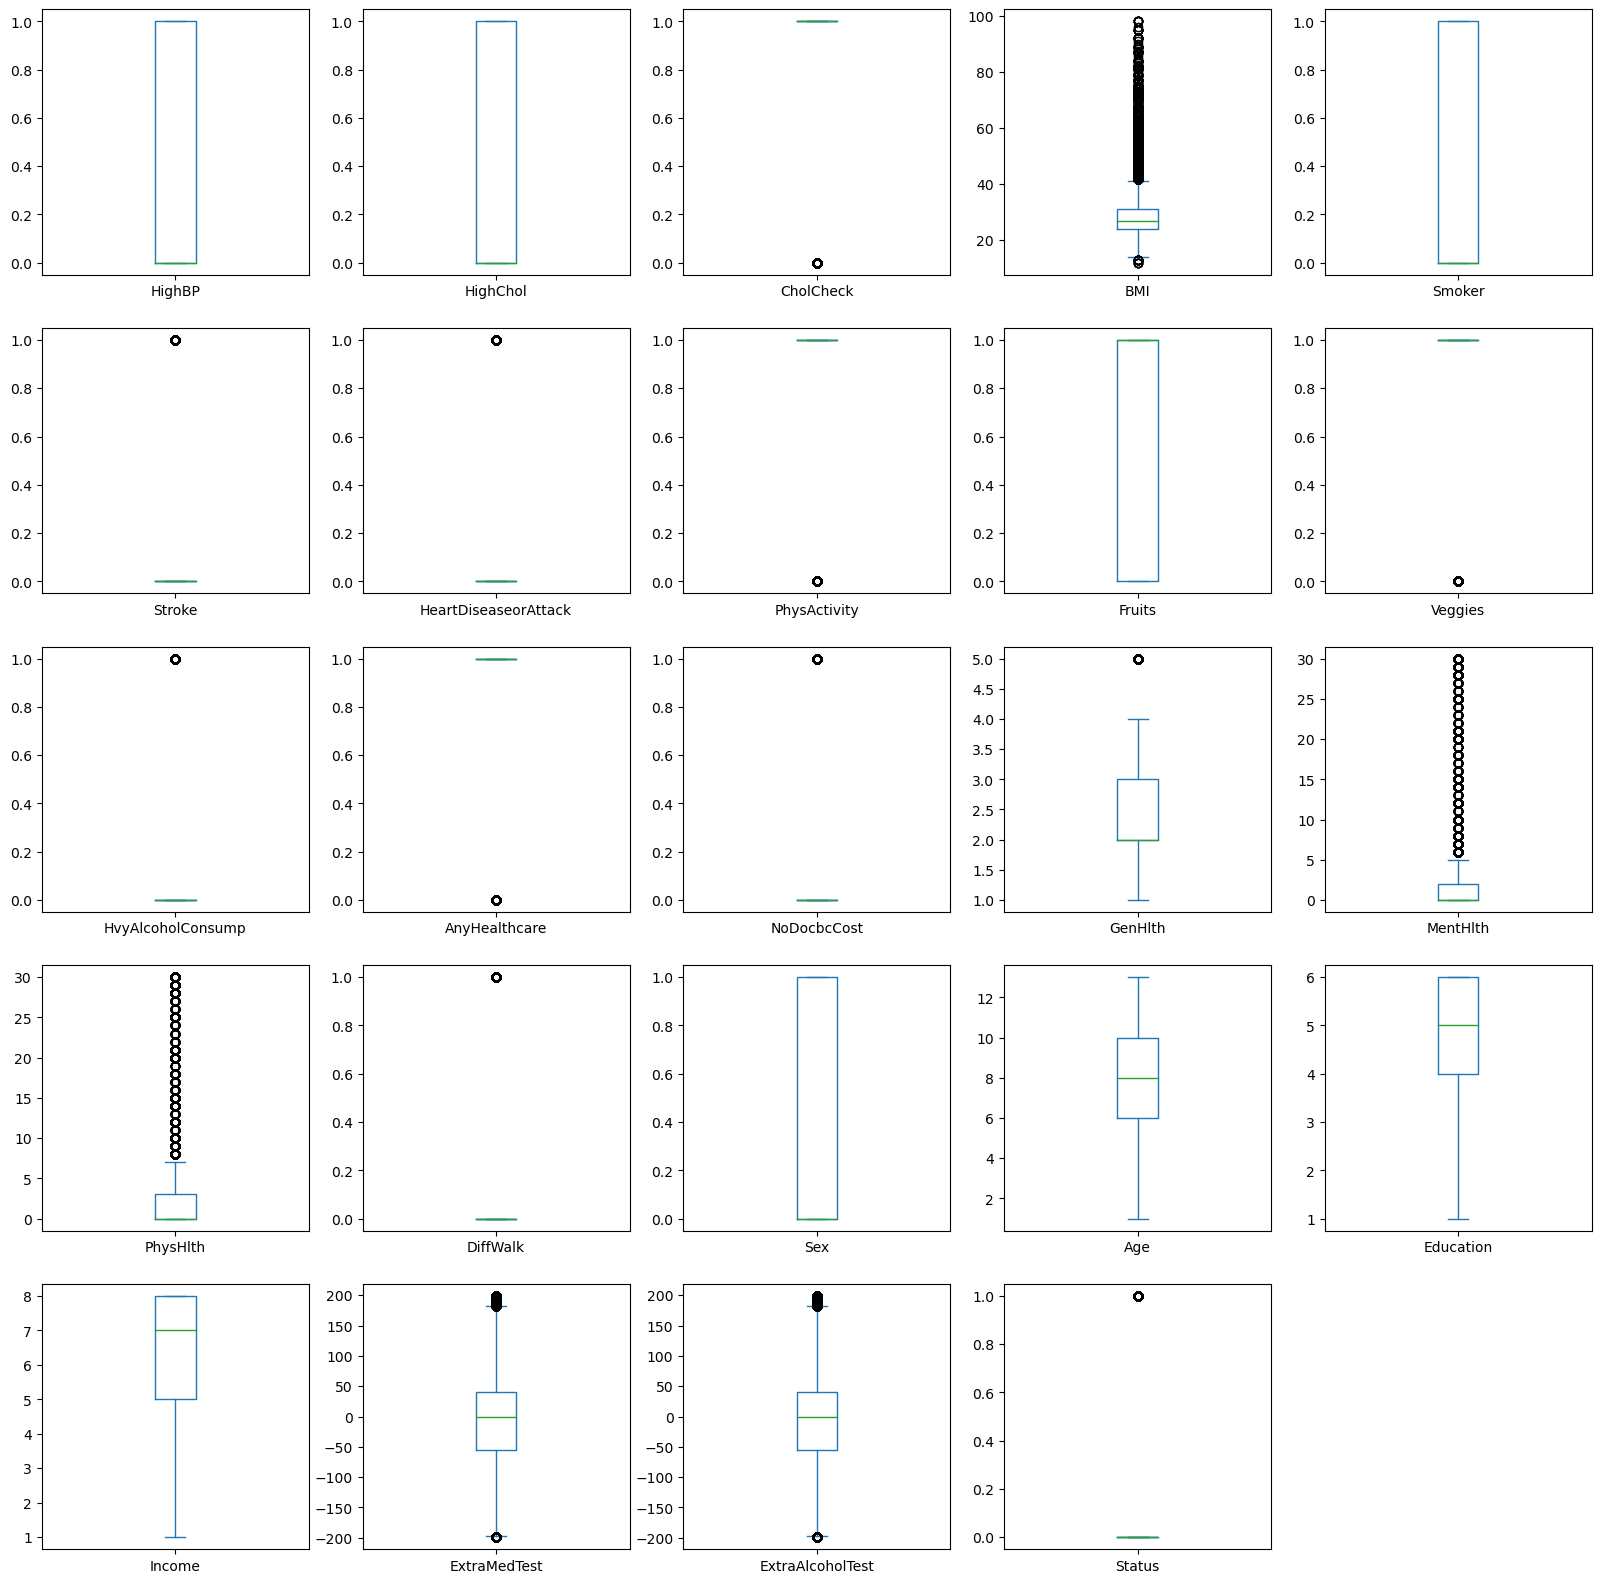

In [6]:
health_data.plot(kind='box', subplots=True, layout=(5, 5), sharex=False, sharey=False, figsize=(20, 20))
plt.show()

<Axes: title={'center': 'Correlation graph'}>

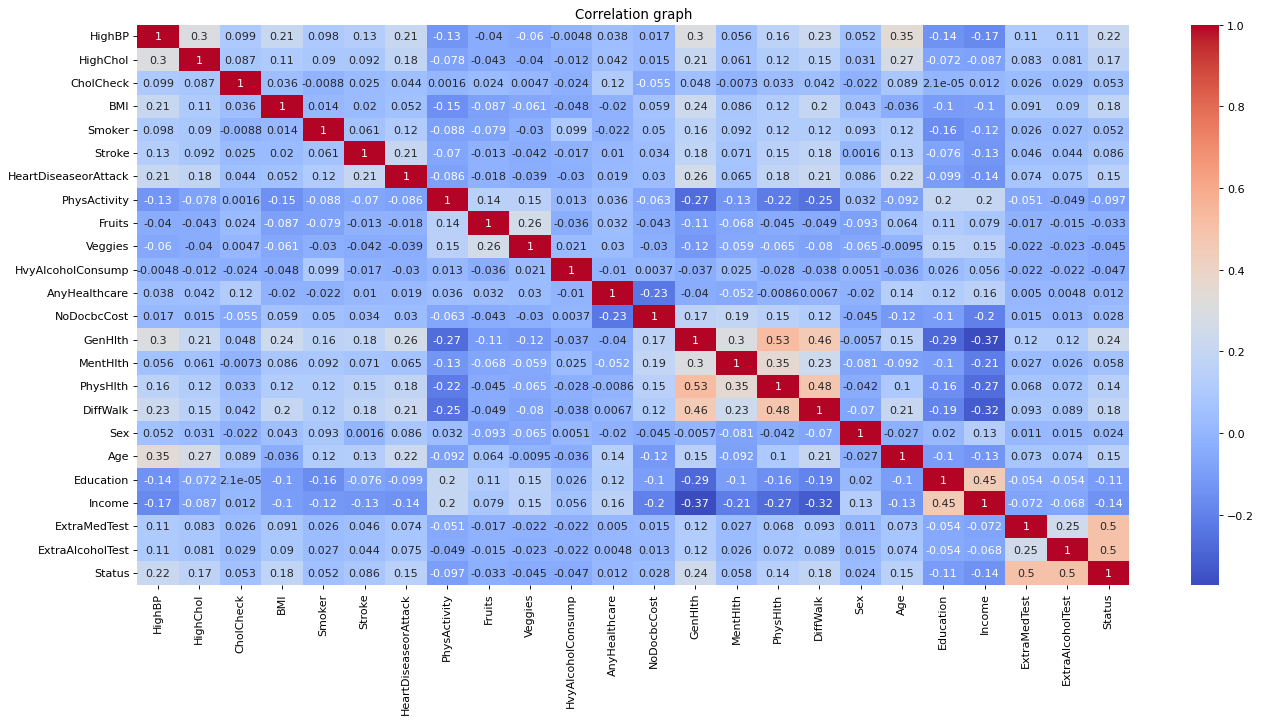

In [7]:
corr = health_data.corr()
fig = plt.figure(figsize=(20, 20), dpi=80)
ax1 = fig.add_subplot(211)
ax1.set_title("Correlation graph")
sns.heatmap(corr, annot=True, cmap="coolwarm")

In addition to plotting histogram and box plot, we can also display the correlation between different columns of the dataset. From `output[7]`, we can see that:
- Some high correlation columns are:
  - GenHlth and PhysHlth: 0.53
  - GenHlth and DiffWalk: 0.46
  - DiffWalk and PhysHlth: 0.48
  - GenHlth and Income: -0.37
  - Status and ExtraMedTest: 0.5
  - Status and ExtraAlcoholTest: 0.5
- CholCheck, Smoker, Stroke, Fruits, Veggies, HvyAlcoholConsump, AnyHealthcare, NoDocbcCost, MentHlth, Sex are low correlated with `Status`

## Feature Engineering

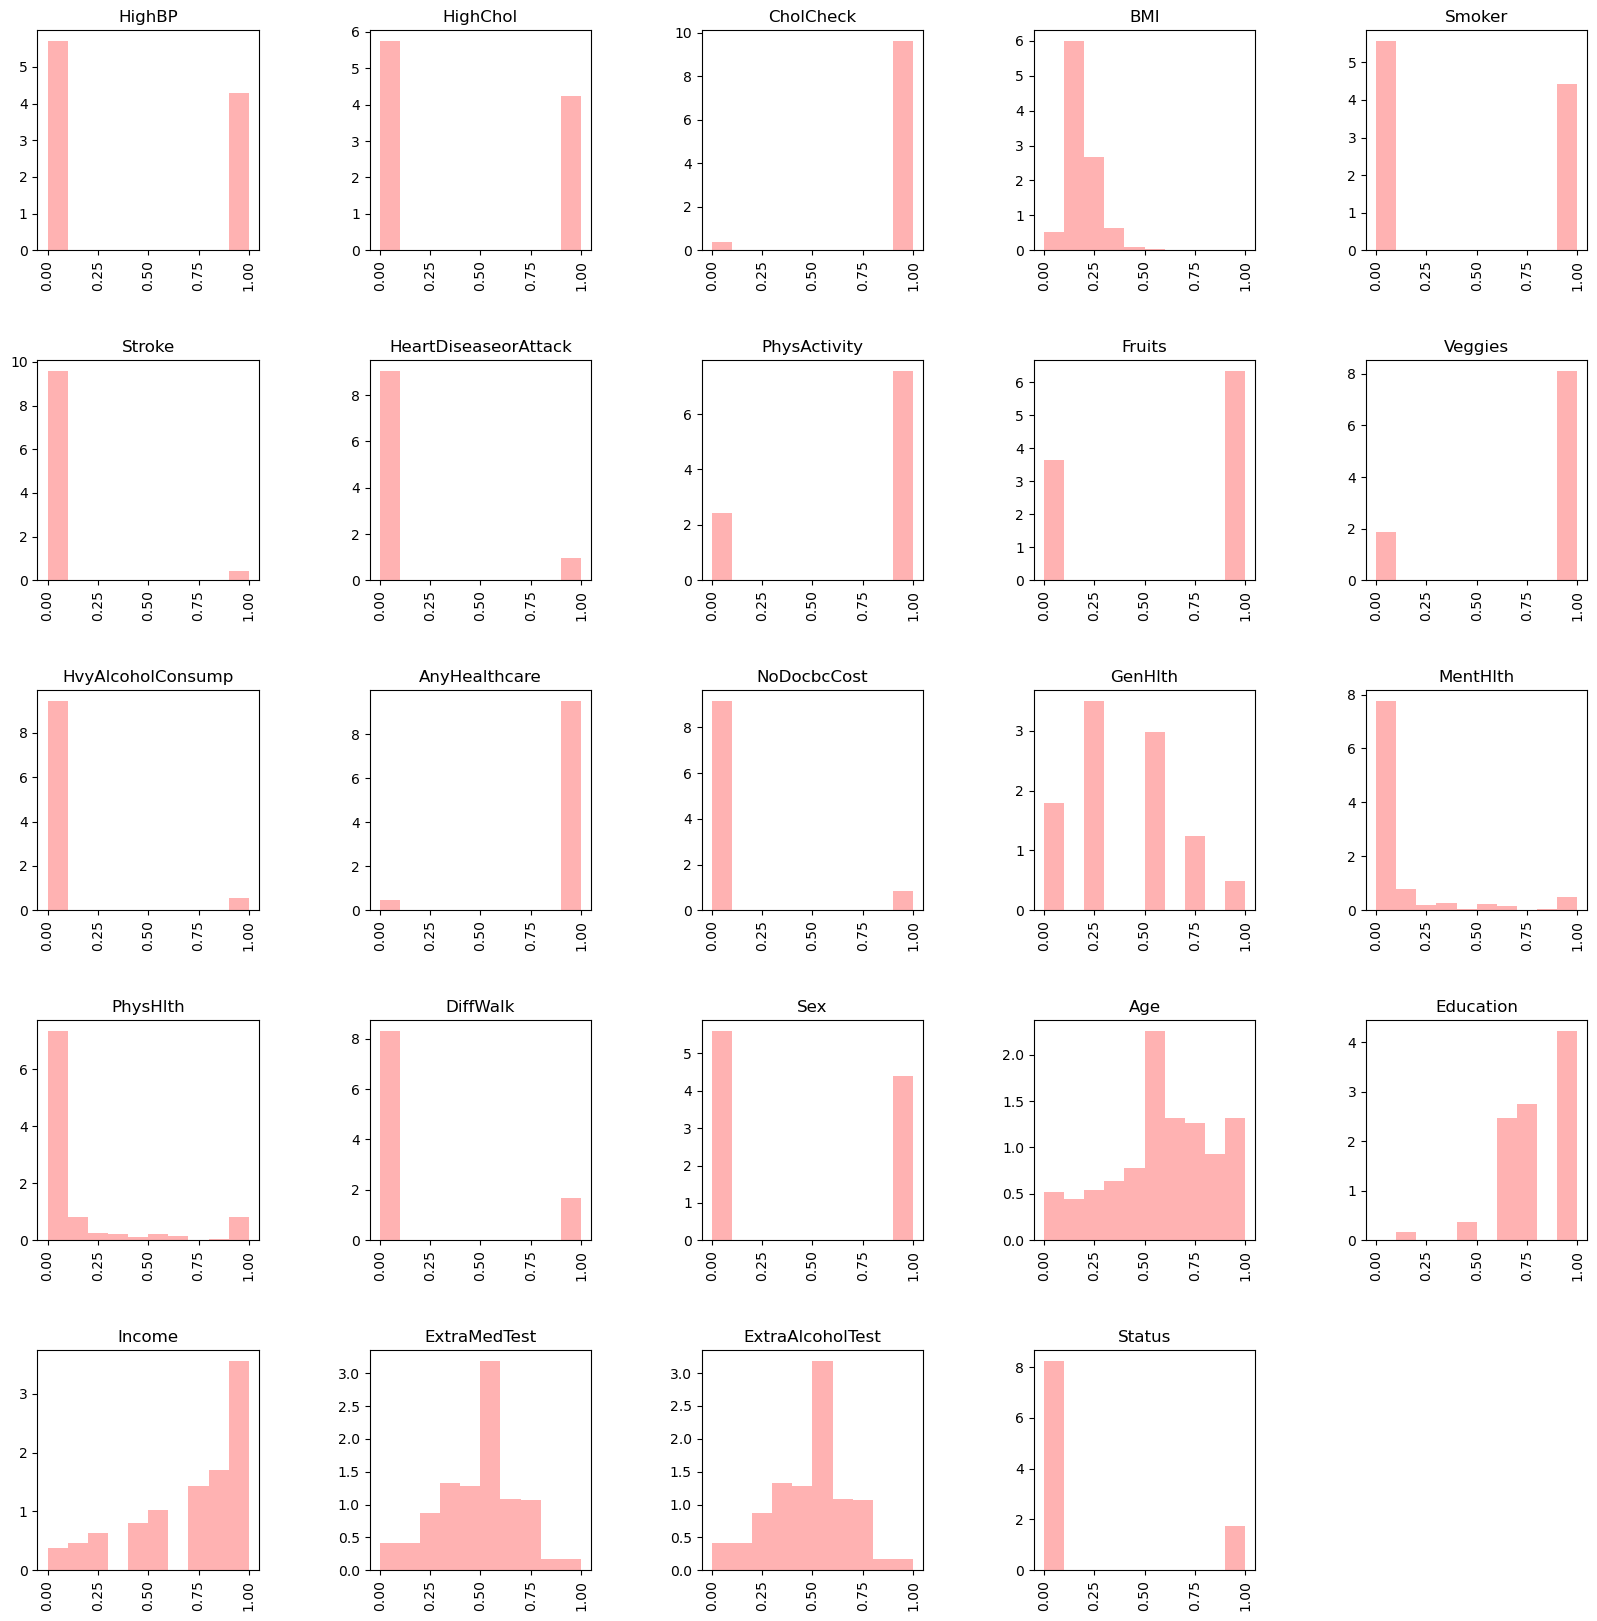

In [8]:
from sklearn.preprocessing import MinMaxScaler

# a list of numerical columns
numerical_cols = ["BMI", "GenHlth", "MentHlth", "PhysHlth", "Age", "Education", "Income", "ExtraMedTest", "ExtraAlcoholTest"]

scaler = MinMaxScaler()

# scaling the columns
health_data[numerical_cols] = scaler.fit_transform(health_data[numerical_cols])

# create a figure to hold different subplots
plt.figure(figsize=(20,20))

# iterate through each column in health_data and plot a corresponding histogram
for i, col in enumerate(health_data.columns):
    plt.subplot(5,5,i+1)
    plt.hist(health_data[col], alpha=0.3, color='r', density=True)
    plt.title(col)
    plt.xticks(rotation='vertical')

# adding space between each subplot
plt.subplots_adjust(wspace=0.5, hspace=0.5)

In [9]:
print("Number of duplicates:", health_data.duplicated().sum())

# remove duplicates in the dataset
health_data = health_data.drop_duplicates()

print("Number of duplicates:", health_data.duplicated().sum())

Number of duplicates: 208
Number of duplicates: 0


In [73]:
# target variable
y = health_data.Status

# all -> 0.9596442385868093
# feature_names = ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
#        'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
#        'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
#        'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
#        'ExtraMedTest', 'ExtraAlcoholTest']

# 0.9596688758037892
# feature_names = ['HighBP', 'HighChol', 'BMI', 'Smoker',
#        'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'NoDocbcCost', 'GenHlth',
#        'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
#        'ExtraMedTest', 'ExtraAlcoholTest']

# not including ExtraMedTest and ExtraAlcoholTest -> BAD
feature_names = ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']


# feature_names = ['HighBP', 'HighChol', 'BMI', 'Stroke',
#        'HeartDiseaseorAttack', 'PhysActivity', 'GenHlth',
#        'MentHlth', 'PhysHlth', 'DiffWalk', 'Age', 'Education', 'Income',
#        'ExtraMedTest', 'ExtraAlcoholTest']

# remove low correlated column to Status -> 0.95966
# feature_names = ['HighBP', 'HighChol', 'BMI',
#        'HeartDiseaseorAttack', 'PhysActivity', 'GenHlth', 
#        'PhysHlth', 'DiffWalk', 'Age', 'Education', 'Income',
#        'ExtraMedTest', 'ExtraAlcoholTest']

# remove low correlated column to Status -> 0.95966
# feature_names = ['HighBP', 'HighChol', 'BMI',
#        'HeartDiseaseorAttack', 'GenHlth', 
#        'PhysHlth', 'DiffWalk', 'Age', 'Education', 'Income',
#        'ExtraMedTest', 'ExtraAlcoholTest']

# feature_names = ['ExtraMedTest', 'ExtraAlcoholTest']

X = health_data[feature_names].copy()

## Model Implementation

In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Break off validation set from training data
train_X, val_X, train_y, val_y = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

print(train_X.shape)
print(val_X.shape)

#specify the model. For model reproducibility, set a numeric value for random_state
model = RandomForestClassifier(random_state=1)
model_2 = DecisionTreeClassifier(random_state=1, max_leaf_nodes=50)  # Ít bị ảnh hưởng bởi outliers
model_3 = LogisticRegression(max_iter=1000)

# Fit the model
model.fit(train_X, train_y)
model_2.fit(train_X, train_y)
model_3.fit(train_X, train_y)
  
predictions = model.predict(val_X)
predictions_2 = model_2.predict(val_X)
predictions_3 = model_3.predict(val_X)

print("Accuracy score of model 1: ", accuracy_score(val_y, predictions))
print("Accuracy score of model 2: ", accuracy_score(val_y, predictions_2))
print("Accuracy score of model 3: ", accuracy_score(val_y, predictions_3))

(162355, 21)
(40589, 21)
Accuracy score of model 1:  0.8205671487348789
Accuracy score of model 2:  0.8267018157628915
Accuracy score of model 3:  0.8288945280741088


In [63]:
# import matplotlib.pyplot as plt

# # Mean Absolute Errors
# mae_values = [accuracy_score(val_y, predictions),
#               accuracy_score(val_y, predictions_2),
#               accuracy_score(val_y, predictions_3)]

# # Model names
# model_names = ['DecisionTreeRegressor',
#                'DecisionTreeClassifier',
#                'LogisticRegression']

# # Create bar plot
# plt.figure(figsize=(10, 6))
# plt.bar(model_names, mae_values, color=['blue', 'green', 'red'])
# plt.xlabel('Models')
# plt.ylabel('Accuracy score')
# plt.title('Accuracy score of Different Models')
# plt.xticks(rotation=45, ha='right')
# plt.show()



<Axes: >

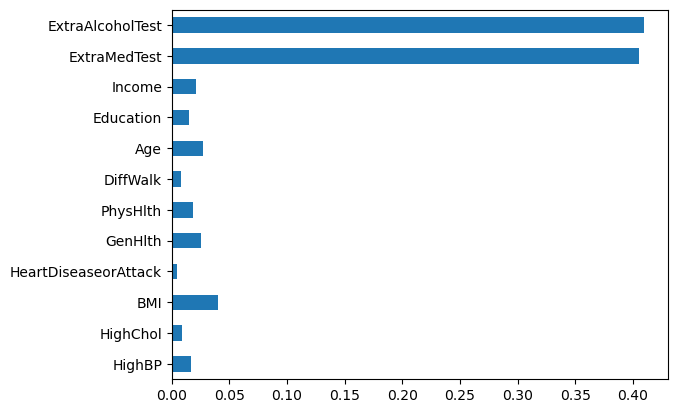

In [64]:
pd.Series(model.feature_importances_, index=X.columns).plot(kind='barh')

[[33191   237]
 [ 1389  5731]]


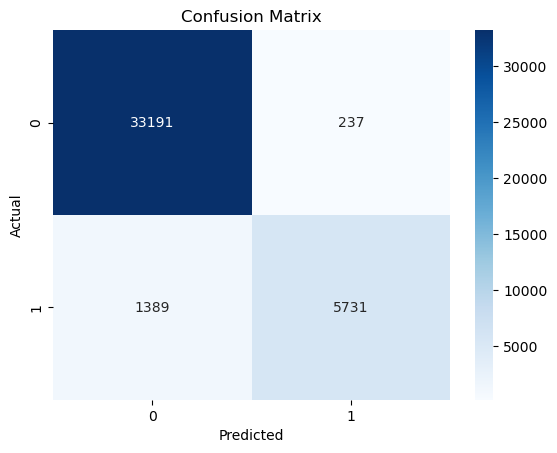

In [13]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(val_y, predictions_2)

print(conf_matrix)

# Plot confusion matrix using seaborn
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', 
            xticklabels=['0', '1'], 
            yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [14]:
def get_accuracy_score(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeClassifier(max_leaf_nodes=max_leaf_nodes, random_state=1)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    ac = accuracy_score(val_y, preds_val)
    return(ac)

# compare MAE with differing values of max_leaf_nodes
for max_leaf_nodes in [5, 50, 60, 70, 80, 90, 100, 500, 1000, 1200, 2000, 5000]:
    my_ac = get_accuracy_score(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Accuracy:  %f" %(max_leaf_nodes, my_ac))

Max leaf nodes: 5  		 Accuracy:  0.956225
Max leaf nodes: 50  		 Accuracy:  0.959899
Max leaf nodes: 60  		 Accuracy:  0.959554
Max leaf nodes: 70  		 Accuracy:  0.959381
Max leaf nodes: 80  		 Accuracy:  0.959480
Max leaf nodes: 90  		 Accuracy:  0.959480
Max leaf nodes: 100  		 Accuracy:  0.959431
Max leaf nodes: 500  		 Accuracy:  0.956965
Max leaf nodes: 1000  		 Accuracy:  0.956422
Max leaf nodes: 1200  		 Accuracy:  0.955707
Max leaf nodes: 2000  		 Accuracy:  0.952821
Max leaf nodes: 5000  		 Accuracy:  0.943277


> CÓ THỂ LÀM MODEL CHẠY CHUẨN HƠN CHO TESTING BẰNG CÁCH TRAIN 100% TRAIN DATA LUÔN!!!, KO CẦN CHỪA LẠI CHO VALIDATION!

You know the best tree size. If you were going to deploy this model in practice, you would make it even more accurate by using all of the data and keeping that tree size. That is, you don't need to hold out the validation data now that you've made all your modeling decisions.

In [70]:
health_data_test = pd.read_csv("data_test.csv", delimiter=",", index_col="Id")

health_data_test = health_data_test.drop("Status", axis=1)

health_data_test.describe()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,ExtraMedTest,ExtraAlcoholTest
count,50736.000000,50736.000000,50736.000000,50736.000000,50736.000000,50736.000000,50736.000000,50736.000000,50736.000000,50736.000000,50736.000000,50736.000000,50736.000000,50736.000000,50736.000000,50736.000000,50736.000000,50736.000000,50736.000000,50736.000000,50736.000000,50736.000000,50736.000000
mean,0.430207,0.423230,0.962729,28.392522,0.445305,0.039479,0.093366,0.757509,0.629789,0.811022,0.057336,0.949089,0.086112,2.500867,3.135978,4.184583,0.166292,0.443531,8.010801,5.051187,6.046811,-10.972189,-11.429202
std,0.495110,0.494076,0.189428,6.592550,0.497004,0.194733,0.290947,0.428594,0.482866,0.391495,0.232486,0.219817,0.280533,1.060819,7.354835,8.642537,0.372346,0.496806,3.064743,0.986477,2.075180,74.323238,74.525657
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,-199.000000,-199.000000
25%,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000,-57.000000,-58.000000
50%,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000,33.000000,32.000000
max,1.000000,1.000000,1.000000,95.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000,199.000000,199.000000


In [71]:

health_data_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50736 entries, 202944 to 253679
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   HighBP                50736 non-null  int64
 1   HighChol              50736 non-null  int64
 2   CholCheck             50736 non-null  int64
 3   BMI                   50736 non-null  int64
 4   Smoker                50736 non-null  int64
 5   Stroke                50736 non-null  int64
 6   HeartDiseaseorAttack  50736 non-null  int64
 7   PhysActivity          50736 non-null  int64
 8   Fruits                50736 non-null  int64
 9   Veggies               50736 non-null  int64
 10  HvyAlcoholConsump     50736 non-null  int64
 11  AnyHealthcare         50736 non-null  int64
 12  NoDocbcCost           50736 non-null  int64
 13  GenHlth               50736 non-null  int64
 14  MentHlth              50736 non-null  int64
 15  PhysHlth              50736 non-null  int64
 16  Dif

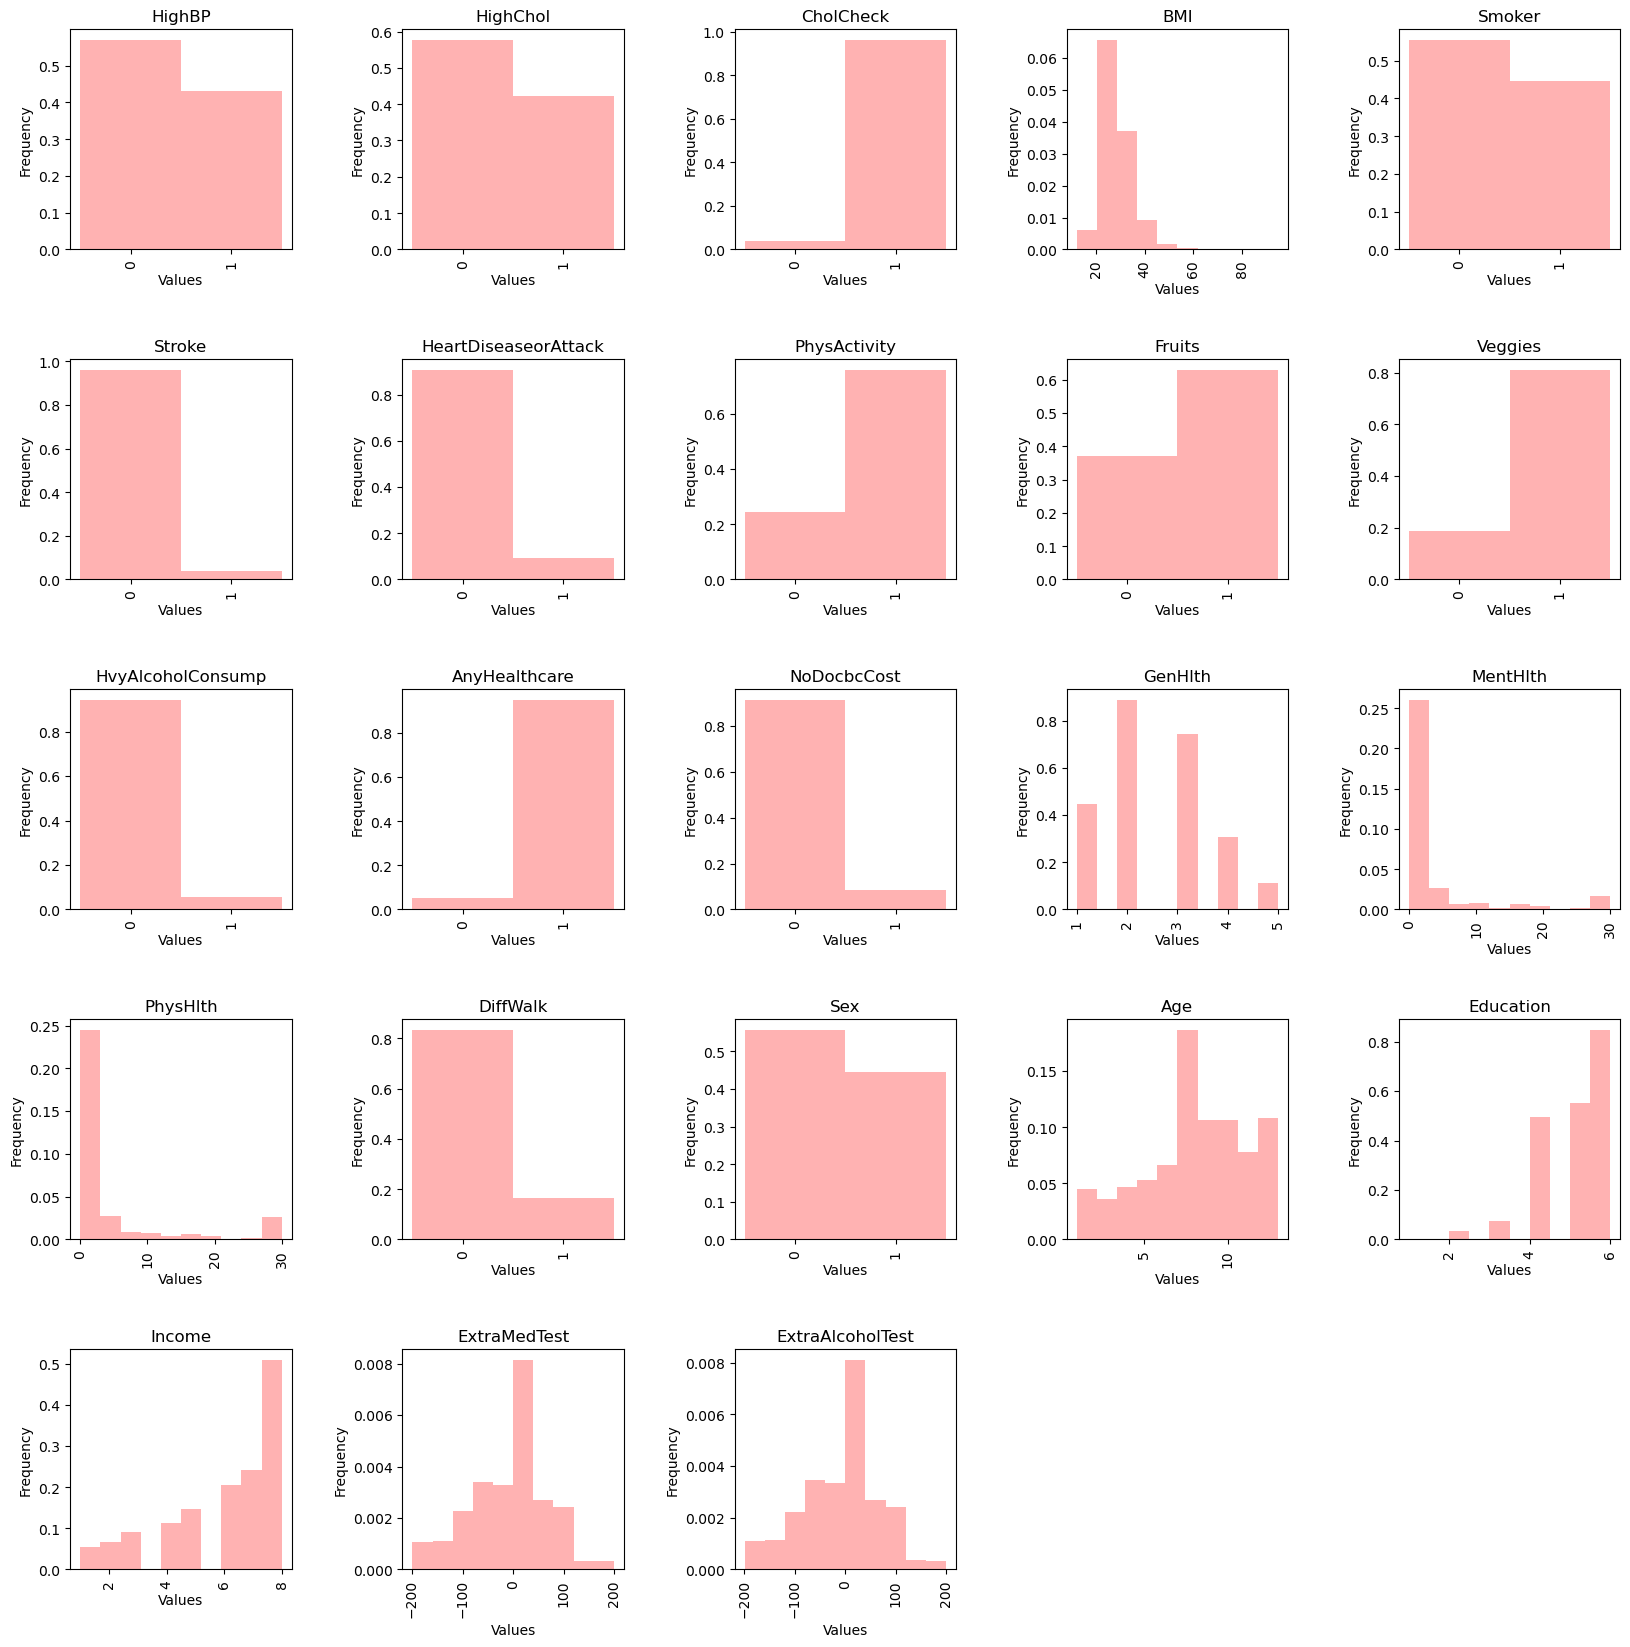

In [72]:
# Create a figure to hold different subplots
plt.figure(figsize=(20,20))

# Iterate through each column in health_data_test and plot a corresponding histogram
for i, col in enumerate(health_data_test.columns):
    plt.subplot(5,5,i+1)
    
    # Check if unique values in the column are only 0 and 1
    if sorted(health_data_test[col].unique()) == [0, 1]:
        plt.hist(health_data_test[col], bins=[-0.5, 0.5, 1.5], alpha=0.3, color='r', density=True)
        plt.xticks([0, 1])
    else:
        plt.hist(health_data_test[col], alpha=0.3, color='r', density=True)
    
    plt.title(col)
    plt.xticks(rotation='vertical')

    # Adding axis labels
    plt.xlabel('Values')
    plt.ylabel('Frequency')

# Adding space between each subplot
plt.subplots_adjust(wspace=0.5, hspace=0.5)

plt.show()




# X_test = health_data_test[feature_names].copy()

# test_prediction = final_model.predict(X_test)

# # Save predictions in format used for competition scoring
# output = pd.DataFrame({'Id': X_test.index,
#                        'Status': test_prediction})
# output.to_csv('submission.csv', index=False)

> **<span style="font-size:1.5em;">⚠</span> Warning: When normalizing, ensure that the same scaling parameters are applied to all splits (train/test/validation).**  
> A common mistake is to use one set of scaling parameters to do the normalization of train data and another on test data. This happens if you apply `fit_transform()` function twice: ones to train set and again for test data.  
> The correct approach would be to do the fit() on train data and then apply the transform() to train set and test set separately, to scale the data. 

> **<span style="font-size:1.5em;">⚠</span> SIÊU CẨN THẬN NHÉ, VÌ MÌNH DÙNG SCALING CHO MODEL NÊN CÁI TEST DATA CŨNG PHẢI SCALE TRC KHI MAKE PREDICTION!!!**

Note:
- Có thể bảo through out cái process này, t sẽ dùng random_state để đảm bảo các random sẽ giống nhau
- Xác định loại ML là supervised learning, cụ thể là binary classification với output là 0 hoặc 1
- Xem có features nào bị high corelation ko
- Feature scaling
- Feature Engineering: It's possible that the features you're using are not capturing all the relevant information. Try creating new features or transforming existing ones to better represent the underlying patterns in the data.
- Cross-Validation: Perform cross-validation to get a better estimate of the model's performance. This helps in assessing how well the model generalizes to unseen data.
- It's also worth noting that decision trees tend to perform well when the dataset has categorical variables with a large number of levels, as they can automatically handle such features without the need for one-hot encoding.
- Phải phân tích đề, chuẩn bị câu hỏi, để gặp thầy!
- Cẩn thận Underfit và Overfit
